In [1]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_datareader import data as wb

%matplotlib inline

In [2]:
# Read Excel Dataset for SFO Arrivals + Departures in 2015-2020
# Note: Data interval is in hours
sfo_data = pd.read_excel('SFOreport_2020.xlsx')
sfo_data = sfo_data.set_index('Date')

In [3]:
# Check SFO data
sfo_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 47712 entries, 2015-01-01 to 2020-06-30
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Airport  47712 non-null  object
 1   Hour     47712 non-null  int64 
 2   Total    47712 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


In [4]:
# Check first 5 of data of SFO
sfo_data.head()

,Airport,Hour,Total
Date,,,
2015-01-01,SFO - San Francisco,0,15
2015-01-01,SFO - San Francisco,1,3
2015-01-01,SFO - San Francisco,2,3
2015-01-01,SFO - San Francisco,4,2
2015-01-01,SFO - San Francisco,5,2


In [5]:
# Check first 5 of data of SFO
sfo_data.tail()

,Airport,Hour,Total
Date,,,
2020-06-30,SFO - San Francisco,17,13
2020-06-30,SFO - San Francisco,18,8
2020-06-30,SFO - San Francisco,19,7
2020-06-30,SFO - San Francisco,20,10
2020-06-30,SFO - San Francisco,21,3


In [6]:
# Total all flights (departures and arrivals) on the same day
# Note: This is done so interval is daily instead of hourly
sfo_data = sfo_data.groupby('Date')['Total'].sum().reset_index()
sfo_data = sfo_data.set_index('Date')
sfo_data

,Total
Date,
2015-01-01,1056
2015-01-02,1263
2015-01-03,1147
2015-01-04,1242
2015-01-05,1211
...,...
2020-06-26,429
2020-06-27,399
2020-06-28,422


In [7]:
# Check aggregated SFO data, now intervals by day
sfo_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2008 entries, 2015-01-01 to 2020-06-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Total   2008 non-null   int64
dtypes: int64(1)
memory usage: 31.4 KB


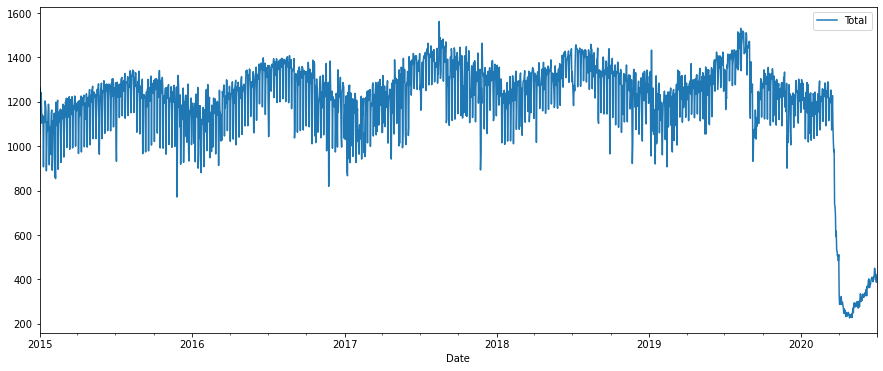

In [8]:
# Plot SFO airport activity, arrival + departure total
sfo_data.plot(figsize=(15,6))

In [9]:
# Create a dataset of multiple airline stocks 
air_ticks = ['DAL', 'LUV', 'UAL', 'AAL', 'ALK', 'JBLU', 'SKYW', 'SAVE', 'ALGT', 'HA', 'BA']
air_stocks = pd.DataFrame()
for a in air_ticks:
    air_stocks[a] = wb.DataReader(a, data_source='yahoo', start='2015-01-01')['Adj Close']
    

In [10]:
# Check stocks dataset
air_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1406 entries, 2015-01-02 to 2020-08-03
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DAL     1406 non-null   float64
 1   LUV     1406 non-null   float64
 2   UAL     1406 non-null   float64
 3   AAL     1406 non-null   float64
 4   ALK     1406 non-null   float64
 5   JBLU    1406 non-null   float64
 6   SKYW    1406 non-null   float64
 7   SAVE    1406 non-null   float64
 8   ALGT    1406 non-null   float64
 9   HA      1406 non-null   float64
 10  BA      1406 non-null   float64
dtypes: float64(11)
memory usage: 131.8 KB


In [11]:
# Airline stocks security log returns
sec_returns = np.log(air_stocks/air_stocks.shift(1))
sec_returns = sec_returns.dropna()
sec_returns

,DAL,LUV,UAL,AAL,ALK,JBLU,SKYW,SAVE,ALGT,HA,BA
Date,,,,,,,,,,,
2015-01-05,-0.016814,-0.024903,-0.002868,-0.000557,-0.014358,-0.036766,-0.037711,0.001884,-0.008241,-0.007149,-0.006950
2015-01-06,-0.023855,-0.028747,-0.024020,-0.015713,-0.011840,-0.016562,-0.048202,-0.016265,-0.005330,-0.034465,-0.011848
2015-01-07,-0.005308,0.008368,0.014603,-0.000566,0.015198,0.008647,0.005745,0.021361,0.014371,0.004528,0.015406
2015-01-08,0.025642,0.026126,0.016797,0.012187,0.017114,-0.014677,0.032209,0.013551,0.034793,0.047322,0.017528
2015-01-09,-0.027560,-0.026371,-0.019701,-0.031040,-0.016109,-0.034180,-0.026497,-0.035869,-0.001160,-0.015792,-0.001975
...,...,...,...,...,...,...,...,...,...,...,...
2020-07-28,0.017108,0.023818,0.031575,0.032818,0.024585,0.007790,0.025669,0.023862,0.013481,0.008387,0.003694
2020-07-29,-0.008517,-0.015606,-0.026959,-0.031941,-0.006881,-0.035542,-0.013793,-0.005456,-0.001915,-0.081436,-0.028679
2020-07-30,-0.030796,-0.026456,-0.025814,-0.019487,-0.002881,0.024815,-0.014338,-0.012848,-0.029169,-0.043778,-0.024760


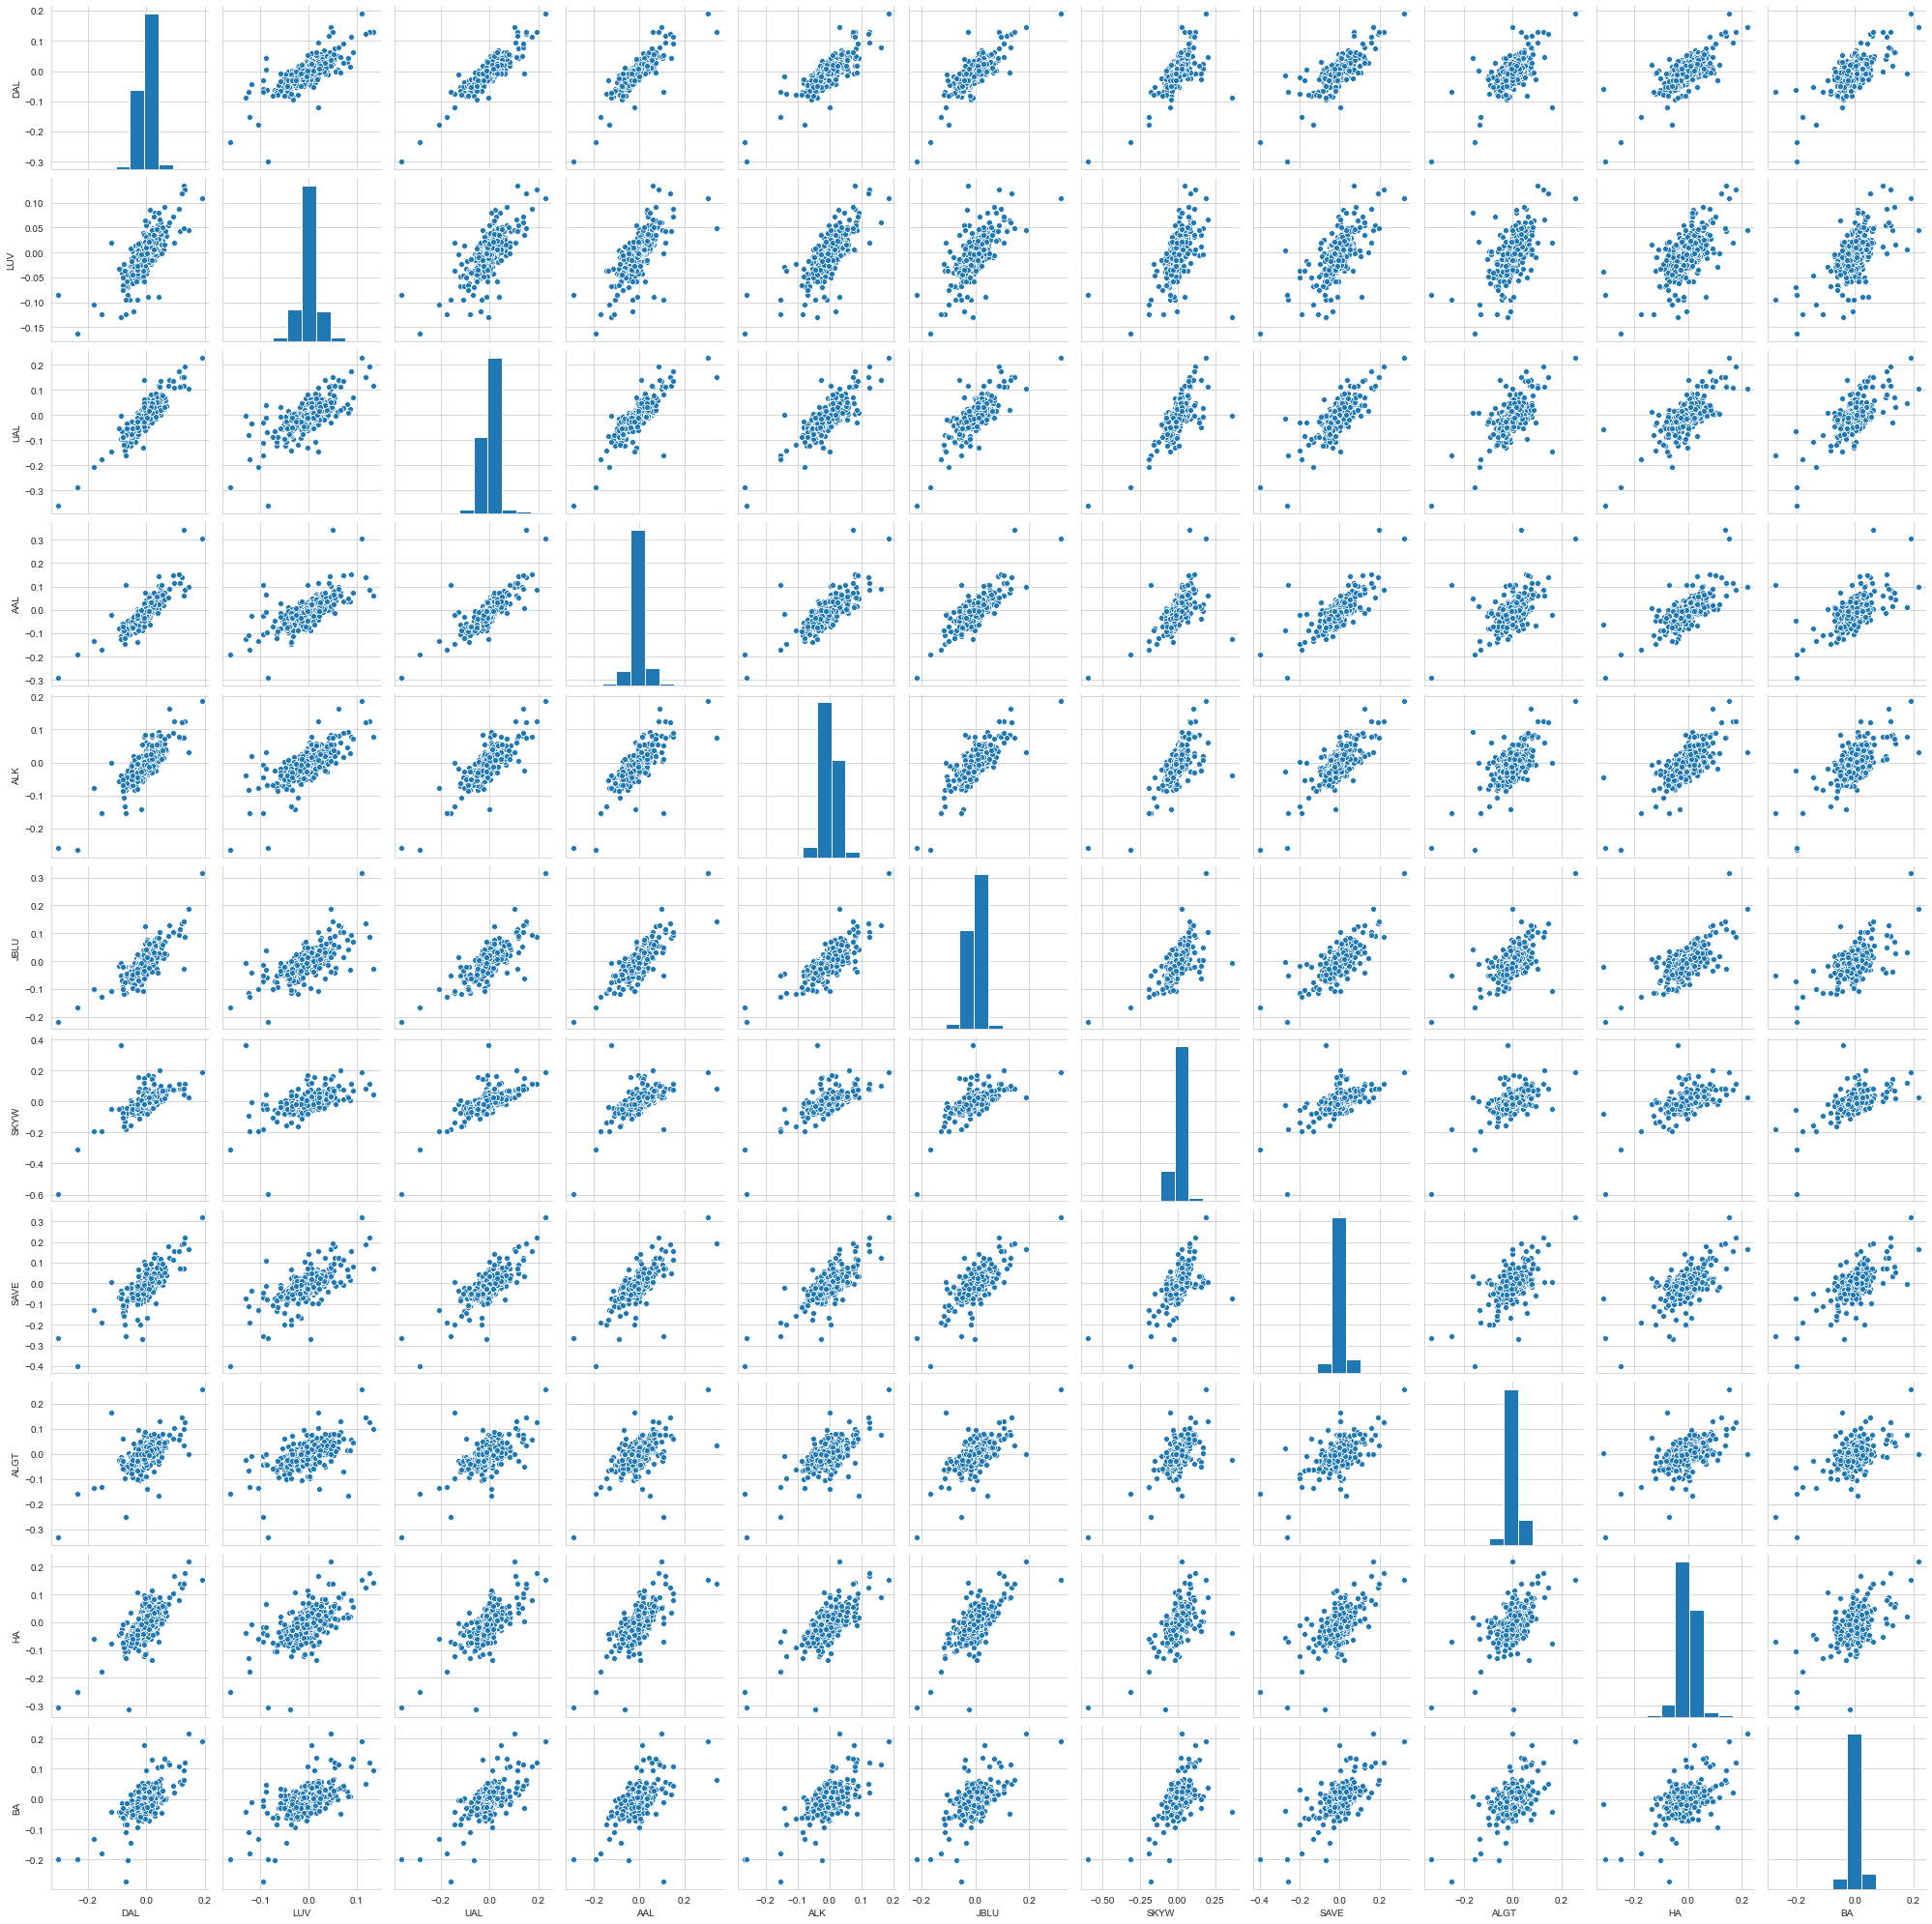

In [12]:
# Correlation between companies and their returns
sns.set_style('whitegrid')
sns.pairplot(sec_returns[1:])
plt.savefig('pairplot.png')
plt.show()

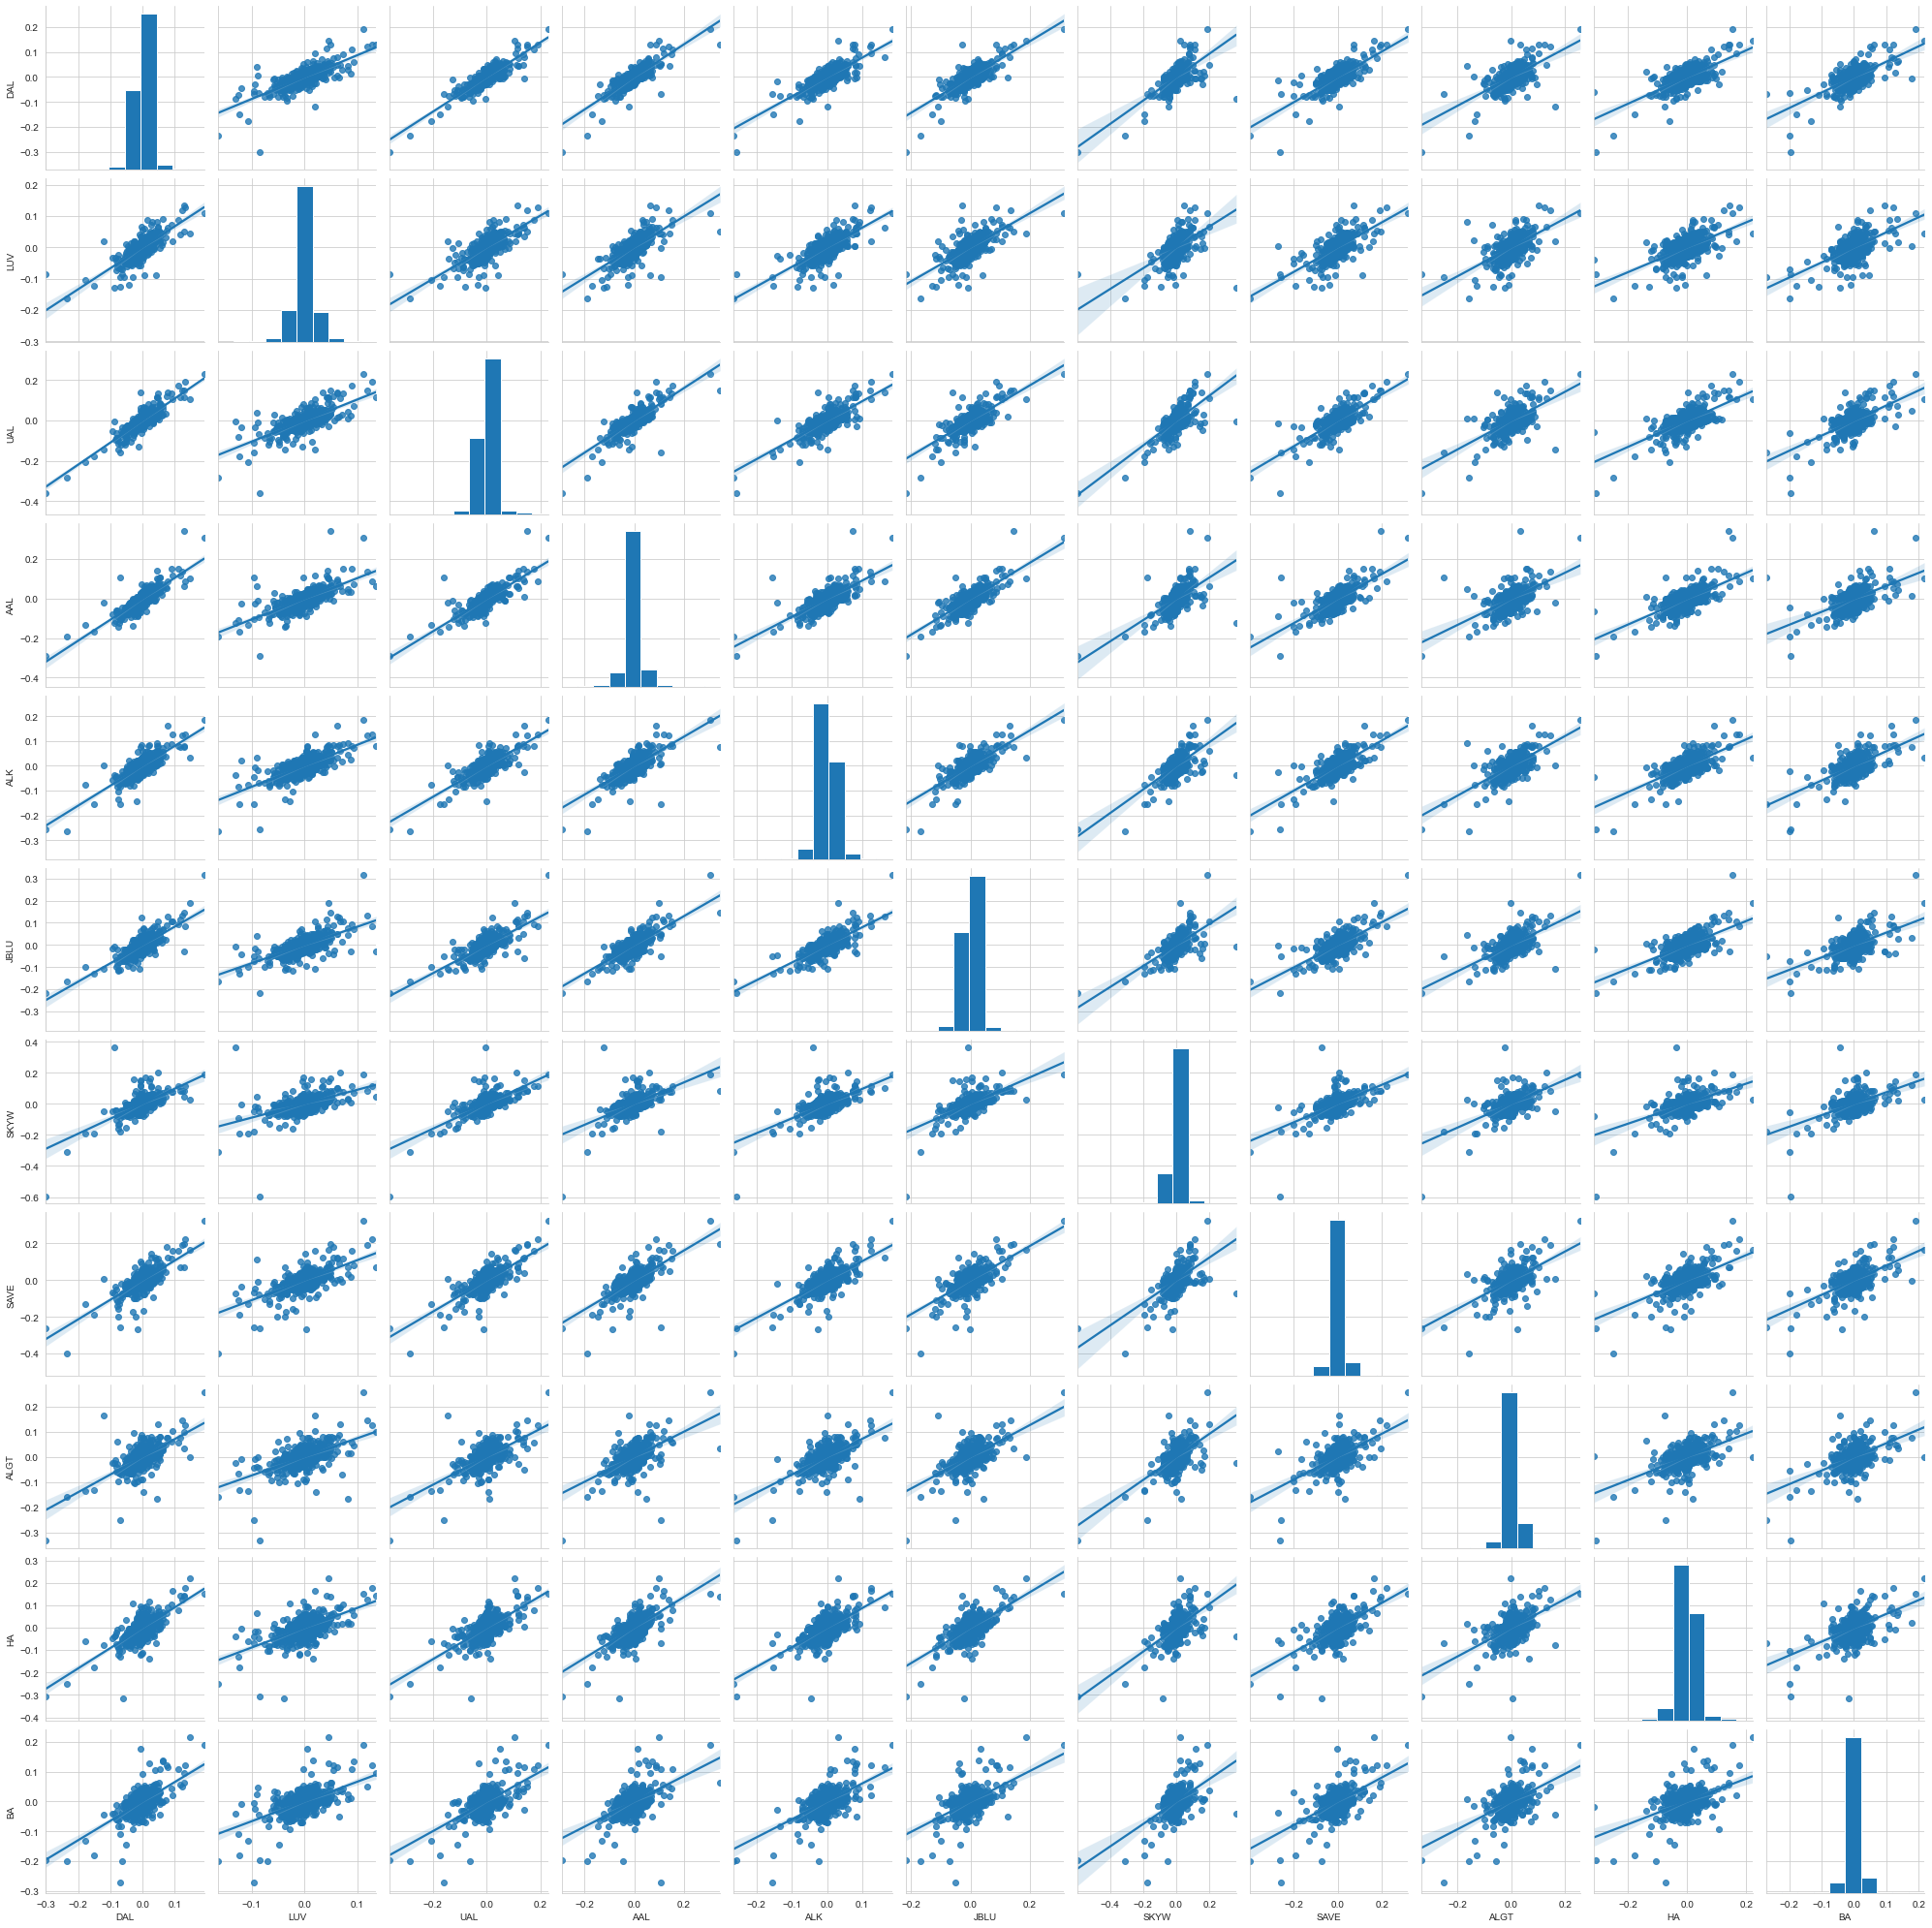

In [13]:
# Correlation between companies and their returns (with regression line)
sns.set_style('whitegrid')
sns.pairplot(sec_returns[1:], kind="reg")
# plt.savefig('pairplot.png')
plt.show()

In [14]:
# Airline stocks daily and annual mean return and standard deviation
for t in air_ticks:
    print("")
    print("#",t)
    print("DAILY")
    print("Daily Return:", round(sec_returns[t].mean()*100, 4), "%")
    print("Daily Risk:", round(sec_returns[t].std()*100, 4), "%")

    print("")

    print("ANNUAL")
    print("Annual Return:", round((sec_returns[t].mean()*250)*100, 4), "%")
    print("Annual Risk:", round((sec_returns[t].std()*250**.5)*100, 4), "%")
    
# Also calculate these when pre-covid


# DAL
DAILY
Daily Return: -0.0401 %
Daily Risk: 2.585 %

ANNUAL
Annual Return: -10.0179 %
Annual Risk: 40.8723 %

# LUV
DAILY
Daily Return: -0.0178 %
Daily Risk: 2.2537 %

ANNUAL
Annual Return: -4.4413 %
Annual Risk: 35.6336 %

# UAL
DAILY
Daily Return: -0.0522 %
Daily Risk: 3.2401 %

ANNUAL
Annual Return: -13.045 %
Annual Risk: 51.23 %

# AAL
DAILY
Daily Return: -0.1088 %
Daily Risk: 3.285 %

ANNUAL
Annual Return: -27.1931 %
Annual Risk: 51.9405 %

# ALK
DAILY
Daily Return: -0.0342 %
Daily Risk: 2.6231 %

ANNUAL
Annual Return: -8.5491 %
Annual Risk: 41.4748 %

# JBLU
DAILY
Daily Return: -0.0317 %
Daily Risk: 2.7752 %

ANNUAL
Annual Return: -7.9333 %
Annual Risk: 43.8797 %

# SKYW
DAILY
Daily Return: 0.0542 %
Daily Risk: 3.7053 %

ANNUAL
Annual Return: 13.541 %
Annual Risk: 58.5852 %

# SAVE
DAILY
Daily Return: -0.112 %
Daily Risk: 3.7367 %

ANNUAL
Annual Return: -27.9882 %
Annual Risk: 59.0831 %

# ALGT
DAILY
Daily Return: -0.0144 %
Daily Risk: 2.8551 %

ANNUAL
Annual Return: -3.5915

In [15]:
# Min for airport activity and return for airlines
print("Min Airport Activity:", sfo_data.idxmin())
print("")
print("Min for Return for Airlines:\n", sec_returns.idxmin())

Min Airport Activity: Total   2020-04-26
dtype: datetime64[ns]

Min for Return for Airlines:
 DAL    2020-03-18
LUV    2020-03-12
UAL    2020-03-18
AAL    2020-03-18
ALK    2020-03-12
JBLU   2020-03-18
SKYW   2020-03-18
SAVE   2020-03-12
ALGT   2020-03-18
HA     2015-01-30
BA     2020-03-16
dtype: datetime64[ns]


In [16]:
# Max for airport activity and return for airport
print("Max Airport Activity:", sfo_data.idxmax())
print("")
print("Max for Return for Airlines:\n", sec_returns.idxmax())

Max Airport Activity: Total   2017-08-16
dtype: datetime64[ns]

Max for Return for Airlines:
 DAL    2020-03-24
LUV    2020-03-13
UAL    2020-03-24
AAL    2020-06-04
ALK    2020-03-24
JBLU   2020-03-24
SKYW   2020-03-19
SAVE   2020-03-24
ALGT   2020-03-24
HA     2020-03-25
BA     2020-03-25
dtype: datetime64[ns]


In [17]:
# Combine data for SFO airport activity and stonk prices
my_data = pd.concat([sfo_data, air_stocks], axis=1)

In [18]:
my_data

,Total,DAL,LUV,UAL,AAL,ALK,JBLU,SKYW,SAVE,ALGT,HA,BA
Date,,,,,,,,,,,,
2015-01-01,1056.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,1263.0,44.267326,40.520412,66.339996,51.079918,54.987873,15.79,12.628334,74.239998,136.278244,24.347927,112.786011
2015-01-03,1147.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-04,1242.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,1211.0,43.529236,39.523785,66.150002,51.051483,54.204021,15.22,12.160972,74.379997,135.159744,24.174490,112.004875
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-28,NaN,25.940001,32.290001,33.459999,11.770000,35.000000,10.31,29.200001,16.540001,115.010002,13.170000,170.839996
2020-07-29,NaN,25.719999,31.790001,32.570000,11.400000,34.759998,9.95,28.799999,16.450001,114.790001,12.140000,166.009995
2020-07-30,NaN,24.940001,30.959999,31.740000,11.180000,34.660000,10.20,28.389999,16.240000,111.489998,11.620000,161.949997


In [19]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2031 entries, 2015-01-01 to 2020-08-03
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Total   2008 non-null   float64
 1   DAL     1406 non-null   float64
 2   LUV     1406 non-null   float64
 3   UAL     1406 non-null   float64
 4   AAL     1406 non-null   float64
 5   ALK     1406 non-null   float64
 6   JBLU    1406 non-null   float64
 7   SKYW    1406 non-null   float64
 8   SAVE    1406 non-null   float64
 9   ALGT    1406 non-null   float64
 10  HA      1406 non-null   float64
 11  BA      1406 non-null   float64
dtypes: float64(12)
memory usage: 206.3 KB


In [20]:
# Drop NaN values across data 
my_data = my_data.dropna(subset=['Total'])
my_data = my_data.dropna(subset=air_ticks)

In [21]:
my_data.tail()

,Total,DAL,LUV,UAL,AAL,ALK,JBLU,SKYW,SAVE,ALGT,HA,BA
Date,,,,,,,,,,,,
2020-06-24,417.0,27.340000,32.250000,33.070000,13.04,34.389999,10.26,29.709999,16.920000,107.889999,13.69,176.690002
2020-06-25,450.0,28.010000,32.970001,34.689999,13.17,35.480000,10.67,31.320000,17.400000,106.949997,14.07,174.880005
2020-06-26,429.0,26.910000,31.959999,32.889999,12.38,34.299999,10.30,30.580000,16.580000,106.699997,13.52,170.009995
2020-06-29,387.0,28.610001,35.040001,35.270000,13.32,36.910000,11.06,32.860001,18.000000,111.629997,14.27,194.490005
2020-06-30,393.0,28.049999,34.180000,34.610001,13.07,36.259998,10.90,32.619999,17.799999,109.209999,14.04,183.300003


In [22]:
# Confirm that all counts are the same so there is no NaN
my_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1383 entries, 2015-01-02 to 2020-06-30
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Total   1383 non-null   float64
 1   DAL     1383 non-null   float64
 2   LUV     1383 non-null   float64
 3   UAL     1383 non-null   float64
 4   AAL     1383 non-null   float64
 5   ALK     1383 non-null   float64
 6   JBLU    1383 non-null   float64
 7   SKYW    1383 non-null   float64
 8   SAVE    1383 non-null   float64
 9   ALGT    1383 non-null   float64
 10  HA      1383 non-null   float64
 11  BA      1383 non-null   float64
dtypes: float64(12)
memory usage: 140.5 KB


In [23]:
# Covariance
my_data_cov = my_data.cov()
my_data_cov

,Total,DAL,LUV,UAL,AAL,ALK,JBLU,SKYW,SAVE,ALGT,HA,BA
Total,52119.717751,1068.970078,885.565931,1872.575249,1178.126028,1505.388899,440.420236,891.584767,1203.048873,1943.099734,1088.018224,5798.856110
DAL,1068.970078,67.605031,58.571177,121.369228,22.076699,37.943294,10.571348,105.791313,20.958858,60.817271,15.311112,649.255054
LUV,885.565931,58.571177,75.936953,110.110172,31.668426,45.901710,8.449729,113.018118,6.385009,11.105959,34.734660,641.424617
UAL,1872.575249,121.369228,110.110172,267.872803,35.502664,78.817117,14.221981,196.653036,82.960341,80.728803,29.277525,1256.187598
AAL,1178.126028,22.076699,31.668426,35.502664,92.528210,75.668248,22.625833,-19.333170,71.294644,104.420203,51.873784,-107.067486
ALK,1505.388899,37.943294,45.901710,78.817117,75.668248,144.051161,30.917561,-4.031285,66.572315,148.810279,90.721784,-131.915676
JBLU,440.420236,10.571348,8.449729,14.221981,22.625833,30.917561,10.881107,-6.134509,17.551038,57.970933,15.860088,-38.565831
SKYW,891.584767,105.791313,113.018118,196.653036,-19.333170,-4.031285,-6.134509,284.278508,-56.176015,-64.443013,14.476516,1606.505910
SAVE,1203.048873,20.958858,6.385009,82.960341,71.294644,66.572315,17.551038,-56.176015,178.641262,141.531572,15.382195,-171.091097
ALGT,1943.099734,60.817271,11.105959,80.728803,104.420203,148.810279,57.970933,-64.443013,141.531572,587.798420,22.093348,-336.481593


In [24]:
# Correlations
my_data_corr = my_data.corr()
my_data_corr

,Total,DAL,LUV,UAL,AAL,ALK,JBLU,SKYW,SAVE,ALGT,HA,BA
Total,1.000000,0.569475,0.445137,0.501157,0.536480,0.549401,0.584830,0.231627,0.394268,0.351059,0.464546,0.250123
DAL,0.569475,1.000000,0.817463,0.901892,0.279131,0.384492,0.389766,0.763112,0.190716,0.305087,0.181514,0.777567
LUV,0.445137,0.817463,1.000000,0.772034,0.377801,0.438878,0.293954,0.769218,0.054821,0.052567,0.388535,0.724821
UAL,0.501157,0.901892,0.772034,1.000000,0.225507,0.401234,0.263426,0.712630,0.379241,0.203446,0.174367,0.755792
AAL,0.536480,0.279131,0.377801,0.225507,1.000000,0.655418,0.713068,-0.119205,0.554535,0.447748,0.525660,-0.109606
ALK,0.549401,0.384492,0.438878,0.401234,0.655418,1.000000,0.780927,-0.019921,0.414996,0.511400,0.736796,-0.108231
JBLU,0.584830,0.389766,0.293954,0.263426,0.713068,0.780927,1.000000,-0.110299,0.398085,0.724869,0.468666,-0.115127
SKYW,0.231627,0.763112,0.769218,0.712630,-0.119205,-0.019921,-0.110299,1.000000,-0.249280,-0.157648,0.083692,0.938258
SAVE,0.394268,0.190716,0.054821,0.379241,0.554535,0.414996,0.398085,-0.249280,1.000000,0.436765,0.112182,-0.126052
ALGT,0.351059,0.305087,0.052567,0.203446,0.447748,0.511400,0.724869,-0.157648,0.436765,1.000000,0.088826,-0.136666


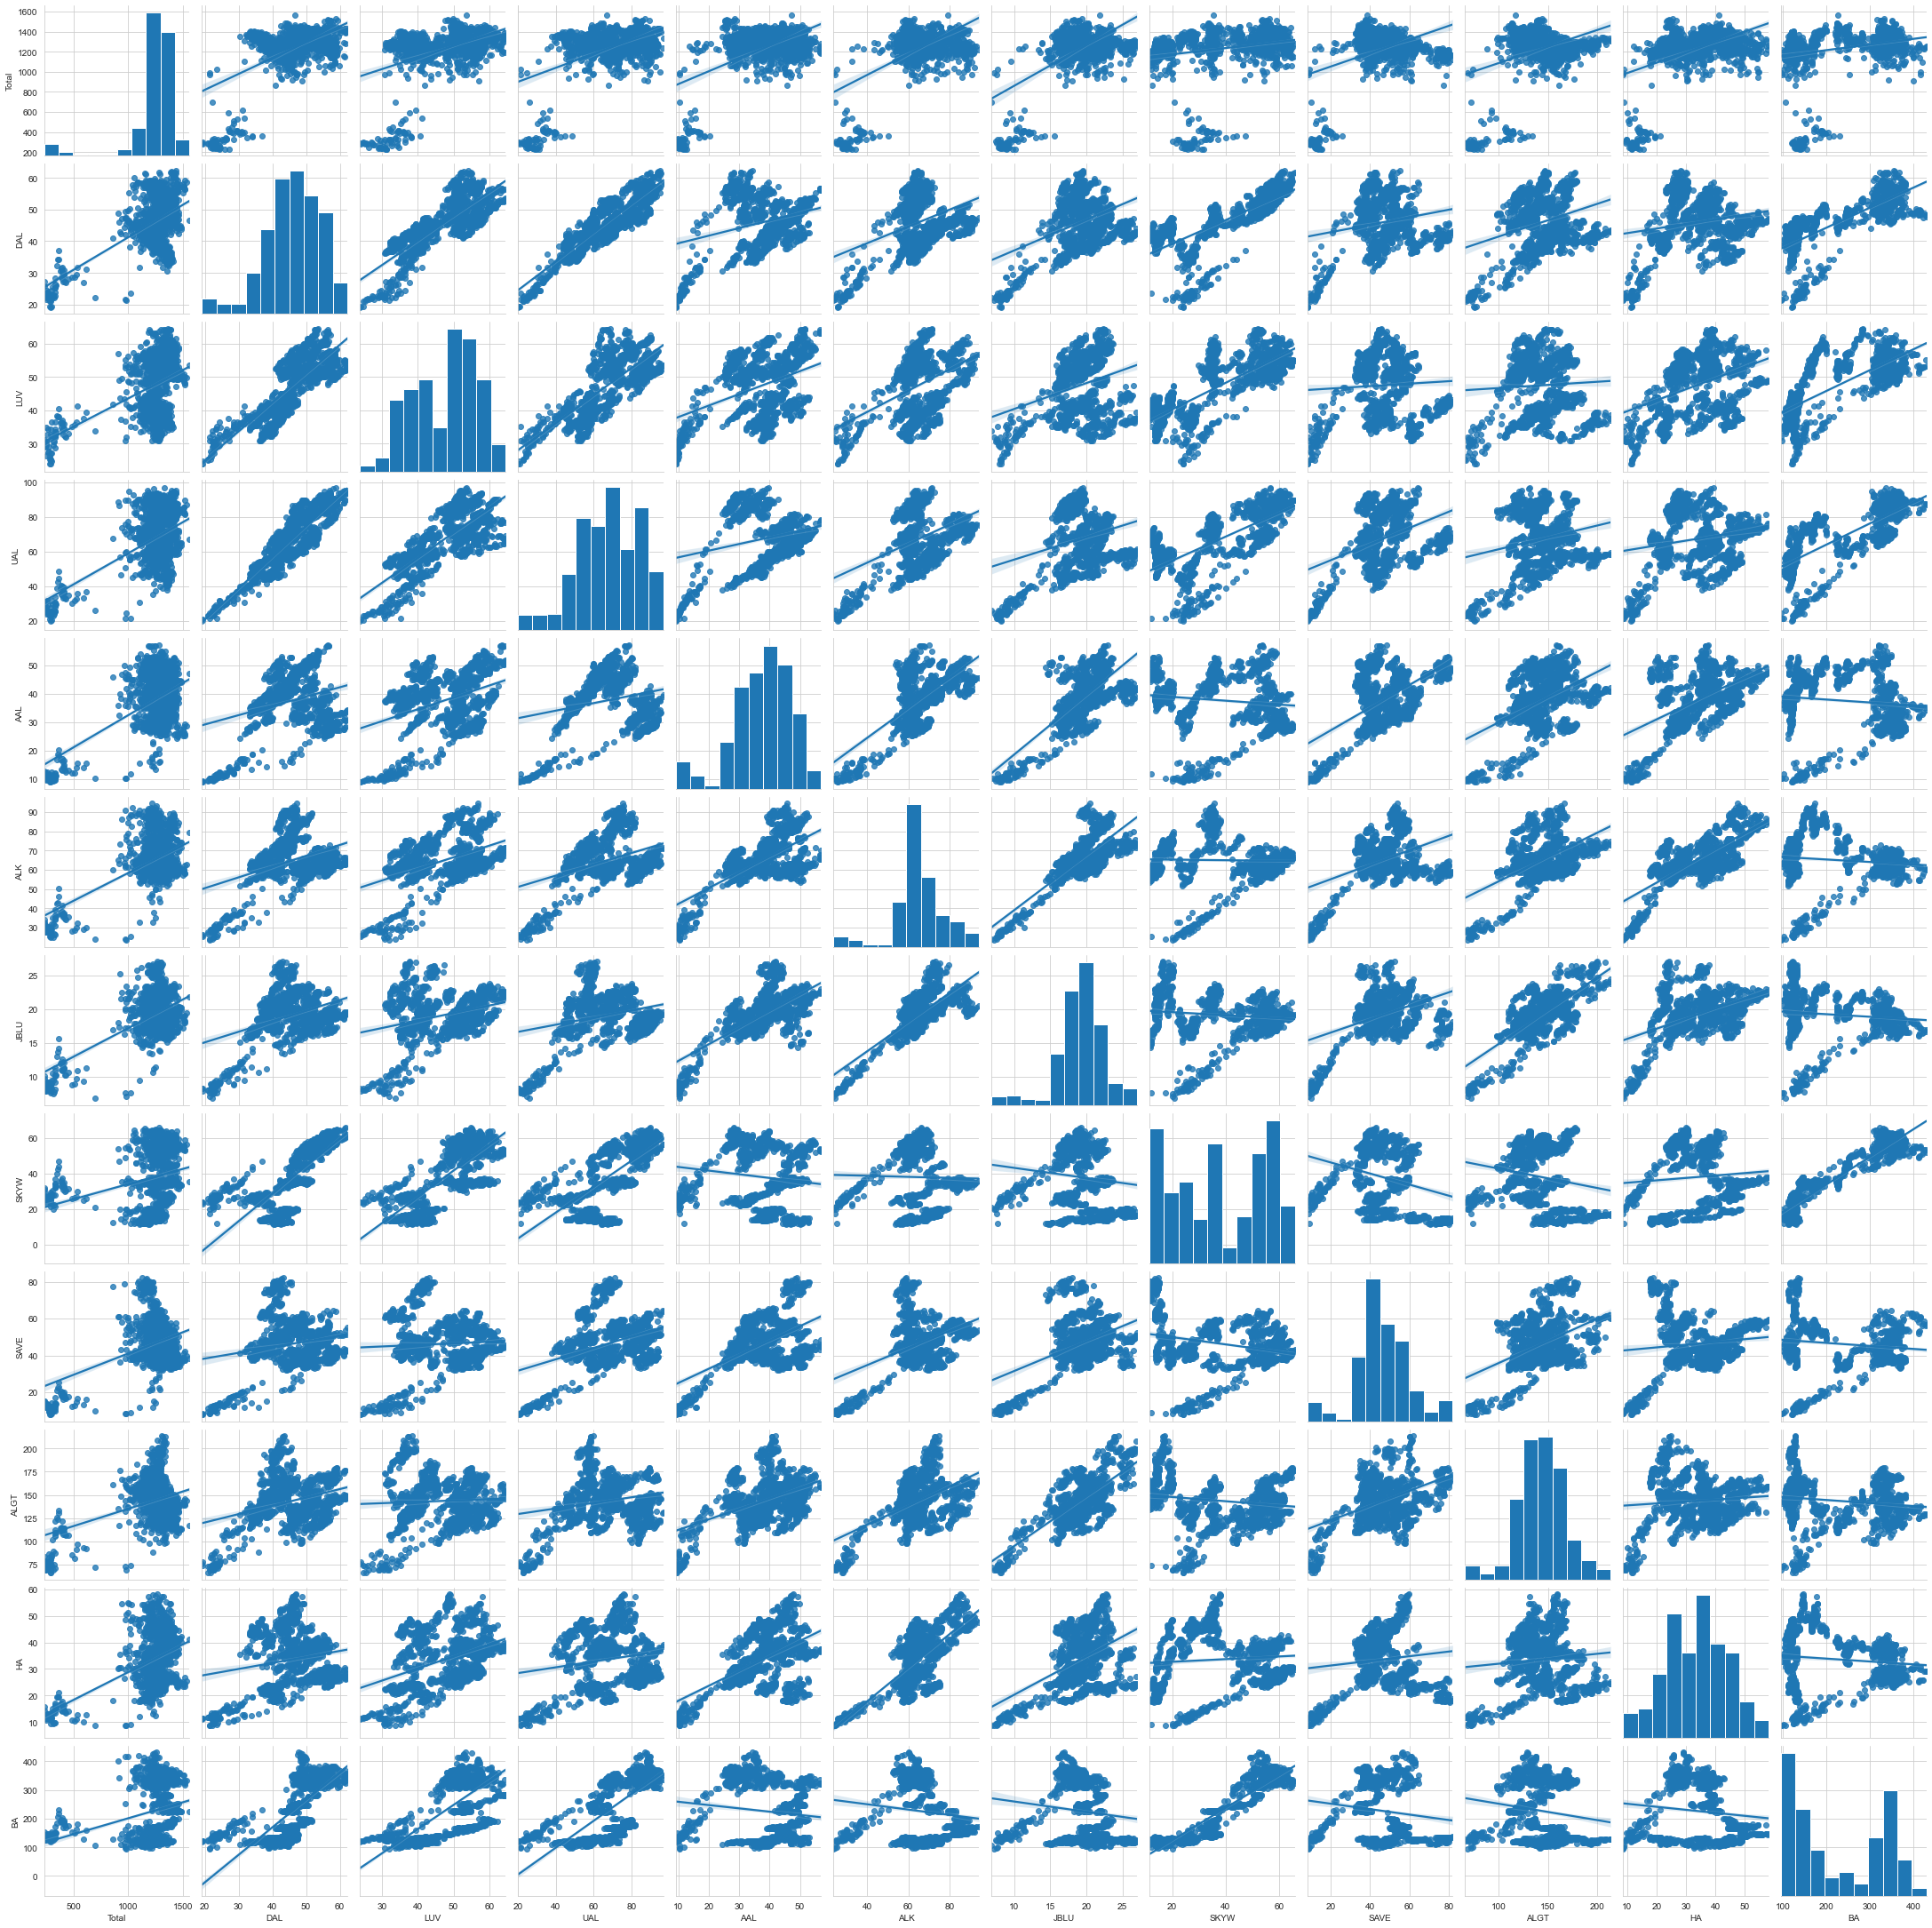

In [25]:
# Correlation between stonk prices and total
sns.set_style('whitegrid')
sns.pairplot(my_data[1:], kind="reg")
# plt.savefig('pairplot.png')
plt.show()

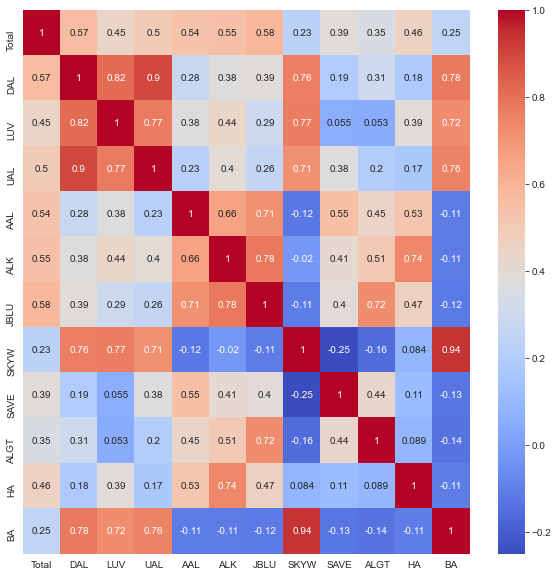

In [26]:
plt.subplots(figsize=(10, 10))
sns.heatmap(my_data_corr, annot=True, cmap='coolwarm')

In [27]:
# Create a dataset of multiple airline stocks , pre-covid
air_ticks_precov = ['DAL', 'LUV', 'UAL', 'AAL', 'ALK', 'JBLU', 'SKYW', 'SAVE', 'ALGT', 'HA', 'BA']
air_stocks_precov = pd.DataFrame()
for a in air_ticks_precov:
    air_stocks_precov[a] = wb.DataReader(a, data_source='yahoo', start='2015-01-01', end='2020-02-14')['Adj Close']
    

In [28]:
air_stocks_precov.tail()

,DAL,LUV,UAL,AAL,ALK,JBLU,SKYW,SAVE,ALGT,HA,BA
Date,,,,,,,,,,,
2020-02-10,57.313931,57.199856,79.470001,28.790001,64.066673,20.020000,56.268562,43.759998,159.045303,28.143543,342.631470
2020-02-11,58.257412,57.707905,80.529999,29.840000,64.185997,20.510000,57.094284,43.310001,163.143295,28.452267,342.382935
2020-02-12,59.061855,58.255795,82.199997,30.469999,65.170418,21.129999,57.462376,43.930000,165.490677,29.000000,345.395020
2020-02-13,58.724190,58.315563,80.989998,30.090000,66.125000,21.559999,58.616398,44.580002,166.206833,28.510000,342.820007
2020-02-14,58.495766,57.747749,79.550003,29.200001,66.110001,21.270000,57.422585,43.880001,164.565643,27.959999,340.489990


In [29]:
# Airline stocks security log returns
sec_returns_precov = np.log(air_stocks_precov/air_stocks_precov.shift(1))
sec_returns_precov = sec_returns_precov.dropna()
sec_returns_precov

,DAL,LUV,UAL,AAL,ALK,JBLU,SKYW,SAVE,ALGT,HA,BA
Date,,,,,,,,,,,
2015-01-05,-0.016814,-0.024903,-0.002868,-0.000557,-0.014358,-0.036766,-0.037711,0.001884,-0.008241,-0.007149,-0.006950
2015-01-06,-0.023855,-0.028747,-0.024020,-0.015713,-0.011840,-0.016562,-0.048202,-0.016265,-0.005330,-0.034465,-0.011848
2015-01-07,-0.005308,0.008368,0.014603,-0.000566,0.015198,0.008647,0.005745,0.021361,0.014371,0.004528,0.015406
2015-01-08,0.025642,0.026126,0.016797,0.012187,0.017114,-0.014677,0.032209,0.013551,0.034793,0.047322,0.017528
2015-01-09,-0.027560,-0.026371,-0.019701,-0.031040,-0.016109,-0.034180,-0.026497,-0.035869,-0.001160,-0.015792,-0.001975
...,...,...,...,...,...,...,...,...,...,...,...
2020-02-10,-0.003632,0.002790,-0.000126,0.014343,0.007321,0.004004,-0.009502,-0.010005,-0.016622,-0.002827,0.023247
2020-02-11,0.016328,0.008843,0.013250,0.035822,0.001861,0.024181,0.014568,-0.010337,0.025440,0.010910,-0.000726
2020-02-12,0.013714,0.009449,0.020525,0.020893,0.015221,0.029781,0.006426,0.014214,0.014286,0.019068,0.008759


In [30]:
for t in air_ticks_precov:
    print("")
    print("#",t)
    print("DAILY")
    print("Daily Return:", round(sec_returns_precov[t].mean()*100, 4), "%")
    print("Daily Risk:", round(sec_returns_precov[t].std()*100, 4), "%")

    print("")

    print("ANNUAL")
    print("Annual Return:", round((sec_returns_precov[t].mean()*250)*100, 4), "%")
    print("Annual Risk:", round((sec_returns_precov[t].std()*250**.5)*100, 4), "%")


# DAL
DAILY
Daily Return: 0.0216 %
Daily Risk: 1.7436 %

ANNUAL
Annual Return: 5.4097 %
Annual Risk: 27.5681 %

# LUV
DAILY
Daily Return: 0.0275 %
Daily Risk: 1.7475 %

ANNUAL
Annual Return: 6.8765 %
Annual Risk: 27.6305 %

# UAL
DAILY
Daily Return: 0.0141 %
Daily Risk: 2.0518 %

ANNUAL
Annual Return: 3.5247 %
Annual Risk: 32.4426 %

# AAL
DAILY
Daily Return: -0.0434 %
Daily Risk: 2.2785 %

ANNUAL
Annual Return: -10.8545 %
Annual Risk: 36.0257 %

# ALK
DAILY
Daily Return: 0.0143 %
Daily Risk: 1.842 %

ANNUAL
Annual Return: 3.5755 %
Annual Risk: 29.1252 %

# JBLU
DAILY
Daily Return: 0.0231 %
Daily Risk: 1.9526 %

ANNUAL
Annual Return: 5.7826 %
Annual Risk: 30.8735 %

# SKYW
DAILY
Daily Return: 0.1176 %
Daily Risk: 2.4106 %

ANNUAL
Annual Return: 29.3962 %
Annual Risk: 38.1149 %

# SAVE
DAILY
Daily Return: -0.0408 %
Daily Risk: 2.5412 %

ANNUAL
Annual Return: -10.2066 %
Annual Risk: 40.1795 %

# ALGT
DAILY
Daily Return: 0.0146 %
Daily Risk: 2.0829 %

ANNUAL
Annual Return: 3.6609 %
Annua